# Streaming process mining with `pyBeamline`

`pyBeamline` is a Python version of Beamline. While the same set of ideas and principles of Beamline have been ported into `pyBeamline`, the underlying goal and technology is very different.

pyBeamline is based on ReactiveX and its Python binding RxPY. RxPY is a library for composing asynchronous and event-based programs using observable sequences and pipable query operators in Python. Using pyBeamline it is possible to inject process mining operators into the computation.

This Jupyter notebook contains the main functionalities currently exposed by `pyBeamline`. For a complete documentation of the library see https://www.beamline.cloud/pybeamline/. In the rest of the notebook it is assumed that the `pyBeamline` package is already installed.

In the rest of this document, the main functionalities are exposed.

It is possible to install the library using:

In [1]:
!pip install pybeamline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.8/217.8 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 804.0/804.0 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.5/292.5 kB 17.3 MB/s eta 0:00:00
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26097 sha256=75fab93cafaa6587f25cea5d3be

In [ ]:
# Let's ignore some PM4PY warnings in the notebook
import warnings
warnings.filterwarnings("ignore")

### Sources

In [ ]:
from pybeamline.sources import string_test_source

string_test_source(["ABC", "ACB", "EFG"]) \
    .subscribe(lambda x: print(str(x)))

(A, case_1, Process, 2024-10-24 13:56:22.134777 - {} - {} - {})
(B, case_1, Process, 2024-10-24 13:56:22.136971 - {} - {} - {})
(C, case_1, Process, 2024-10-24 13:56:22.137522 - {} - {} - {})
(A, case_2, Process, 2024-10-24 13:56:22.138008 - {} - {} - {})
(C, case_2, Process, 2024-10-24 13:56:22.138480 - {} - {} - {})
(B, case_2, Process, 2024-10-24 13:56:22.138980 - {} - {} - {})
(E, case_3, Process, 2024-10-24 13:56:22.139455 - {} - {} - {})
(F, case_3, Process, 2024-10-24 13:56:22.139979 - {} - {} - {})
(G, case_3, Process, 2024-10-24 13:56:22.140448 - {} - {} - {})


In [ ]:
!wget https://raw.githubusercontent.com/beamline/pybeamline/refs/heads/master/tests/log.xes

--2024-10-24 13:57:08--  https://raw.githubusercontent.com/beamline/pybeamline/refs/heads/master/tests/log.xes
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2029 (2.0K) [text/plain]
Saving to: ‘log.xes.1’

log.xes.1           100%[===================>]   1.98K  --.-KB/s    in 0s      

2024-10-24 13:57:08 (30.9 MB/s) - ‘log.xes.1’ saved [2029/2029]



In [ ]:
from pybeamline.sources import xes_log_source_from_file

xes_log_source_from_file("log.xes") \
    .subscribe(lambda x: print(str(x)))

parsing log, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

(a11, c1, log-file, 2024-10-24 09:02:51.070206 - {'lifecycle:transition': 'complete', 'act': 'a11'} - {'variant': 'Variant 1', 'creator': 'Fluxicon Disco', 'variant-index': 1} - {})
(a12, c1, log-file, 2024-10-24 09:02:51.073318 - {'lifecycle:transition': 'complete', 'act': 'a12'} - {'variant': 'Variant 1', 'creator': 'Fluxicon Disco', 'variant-index': 1} - {})
(a21, c2, log-file, 2024-10-24 09:02:51.074364 - {'lifecycle:transition': 'complete', 'act': 'a21'} - {'variant': 'Variant 2', 'creator': 'Fluxicon Disco', 'variant-index': 2} - {})
(a22, c2, log-file, 2024-10-24 09:02:51.076163 - {'lifecycle:transition': 'complete', 'act': 'a22'} - {'variant': 'Variant 2', 'creator': 'Fluxicon Disco', 'variant-index': 2} - {})
(a23, c2, log-file, 2024-10-24 09:02:51.077837 - {'lifecycle:transition': 'complete', 'act': 'a23'} - {'variant': 'Variant 2', 'creator': 'Fluxicon Disco', 'variant-index': 2} - {})


In [ ]:
from pybeamline.sources import log_source

log_source(["ABC", "ACB", "EFG"]) \
    .subscribe(lambda x: print(str(x)))

log_source("log.xes") \
    .subscribe(lambda x: print(str(x)))

(A, case_1, Process, 2024-10-24 09:03:10.411580 - {} - {} - {})
(B, case_1, Process, 2024-10-24 09:03:10.414995 - {} - {} - {})
(C, case_1, Process, 2024-10-24 09:03:10.415772 - {} - {} - {})
(A, case_2, Process, 2024-10-24 09:03:10.416392 - {} - {} - {})
(C, case_2, Process, 2024-10-24 09:03:10.416952 - {} - {} - {})
(B, case_2, Process, 2024-10-24 09:03:10.417453 - {} - {} - {})
(E, case_3, Process, 2024-10-24 09:03:10.417987 - {} - {} - {})
(F, case_3, Process, 2024-10-24 09:03:10.418303 - {} - {} - {})
(G, case_3, Process, 2024-10-24 09:03:10.418359 - {} - {} - {})


parsing log, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

(a11, c1, log-file, 2024-10-24 09:03:10.472343 - {'lifecycle:transition': 'complete', 'act': 'a11'} - {'variant': 'Variant 1', 'creator': 'Fluxicon Disco', 'variant-index': 1} - {})
(a12, c1, log-file, 2024-10-24 09:03:10.474654 - {'lifecycle:transition': 'complete', 'act': 'a12'} - {'variant': 'Variant 1', 'creator': 'Fluxicon Disco', 'variant-index': 1} - {})
(a21, c2, log-file, 2024-10-24 09:03:10.476066 - {'lifecycle:transition': 'complete', 'act': 'a21'} - {'variant': 'Variant 2', 'creator': 'Fluxicon Disco', 'variant-index': 2} - {})
(a22, c2, log-file, 2024-10-24 09:03:10.477115 - {'lifecycle:transition': 'complete', 'act': 'a22'} - {'variant': 'Variant 2', 'creator': 'Fluxicon Disco', 'variant-index': 2} - {})
(a23, c2, log-file, 2024-10-24 09:03:10.478081 - {'lifecycle:transition': 'complete', 'act': 'a23'} - {'variant': 'Variant 2', 'creator': 'Fluxicon Disco', 'variant-index': 2} - {})


In [ ]:
from pybeamline.sources import mqttxes_source

mqttxes_source('broker.mqtt.cool', 1883, 'bla/bla/') \
  .subscribe(lambda x: print(str(x)))

input()

Connected to MQTT broker
(B, c62, p1, 2024-10-23 13:42:55.596588 - {'test-attribute': 42} - {} - {})



''

In [ ]:
from reactivex import concat
from pybeamline.sources import xes_log_source_from_file, log_source

src1 = xes_log_source_from_file("log.xes")
src2 = log_source(["ABCD", "ABCD"])
src3 = xes_log_source_from_file("log.xes")

concat = concat(src1, src2, src3)
concat \
    .subscribe(lambda x: print(str(x)))


parsing log, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

(a11, c1, log-file, 2024-10-24 13:57:14.621877 - {'act': 'a11', 'lifecycle:transition': 'complete'} - {'creator': 'Fluxicon Disco', 'variant-index': 1, 'variant': 'Variant 1'} - {})
(a12, c1, log-file, 2024-10-24 13:57:14.624663 - {'act': 'a12', 'lifecycle:transition': 'complete'} - {'creator': 'Fluxicon Disco', 'variant-index': 1, 'variant': 'Variant 1'} - {})
(a21, c2, log-file, 2024-10-24 13:57:14.626181 - {'act': 'a21', 'lifecycle:transition': 'complete'} - {'creator': 'Fluxicon Disco', 'variant-index': 2, 'variant': 'Variant 2'} - {})
(a22, c2, log-file, 2024-10-24 13:57:14.627286 - {'act': 'a22', 'lifecycle:transition': 'complete'} - {'creator': 'Fluxicon Disco', 'variant-index': 2, 'variant': 'Variant 2'} - {})
(a23, c2, log-file, 2024-10-24 13:57:14.628217 - {'act': 'a23', 'lifecycle:transition': 'complete'} - {'creator': 'Fluxicon Disco', 'variant-index': 2, 'variant': 'Variant 2'} - {})
(A, case_1, Process, 2024-10-24 13:57:14.629108 - {} - {} - {})
(B, case_1, Process, 2024-

### Filters

In [ ]:
from pybeamline.sources import log_source
from pybeamline.filters import excludes_activity_filter

log_source("log.xes").pipe(
    excludes_activity_filter("a11"),
).subscribe(lambda x: print(str(x)))

# Similar functionalities for these filters:
# - excludes_on_event_attribute_equal_filter
# - retains_on_trace_attribute_equal_filter
# - excludes_on_trace_attribute_equal_filter
# - retains_activity_filter
# - excludes_activity_filter


parsing log, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

(a12, c1, log-file, 2024-10-24 09:03:16.260189 - {'lifecycle:transition': 'complete', 'act': 'a12'} - {'variant': 'Variant 1', 'creator': 'Fluxicon Disco', 'variant-index': 1} - {})
(a21, c2, log-file, 2024-10-24 09:03:16.261748 - {'lifecycle:transition': 'complete', 'act': 'a21'} - {'variant': 'Variant 2', 'creator': 'Fluxicon Disco', 'variant-index': 2} - {})
(a22, c2, log-file, 2024-10-24 09:03:16.262964 - {'lifecycle:transition': 'complete', 'act': 'a22'} - {'variant': 'Variant 2', 'creator': 'Fluxicon Disco', 'variant-index': 2} - {})
(a23, c2, log-file, 2024-10-24 09:03:16.267345 - {'lifecycle:transition': 'complete', 'act': 'a23'} - {'variant': 'Variant 2', 'creator': 'Fluxicon Disco', 'variant-index': 2} - {})


### Discovery techniques

Mining of directly-follows relations:

In [ ]:
from pybeamline.sources import log_source
from pybeamline.mappers import infinite_size_directly_follows_mapper

log_source(["ABC", "ACB"]).pipe(
    infinite_size_directly_follows_mapper()
).subscribe(lambda x: print(str(x)))

('A', 'B')
('B', 'C')
('A', 'C')
('C', 'B')


Mining of a Heuristics net using Lossy Counting:

In [ ]:
from pybeamline.algorithms.discovery import heuristics_miner_lossy_counting

log_source(["ABCD", "ABCD"]).pipe(
    heuristics_miner_lossy_counting(model_update_frequency=4)
).subscribe(lambda x: print(str(x)))

{'A': (node:A connections:{B:[0.5]}), 'B': (node:B connections:{C:[0.5]}), 'C': (node:C connections:{})}
{'C': (node:C connections:{D:[0.5]}), 'D': (node:D connections:{}), 'A': (node:A connections:{B:[0.6666666666666666]}), 'B': (node:B connections:{C:[0.6666666666666666]})}


Mining of a Heuristics net using Lossy Counting with Budget:

In [ ]:
from pybeamline.algorithms.discovery import heuristics_miner_lossy_counting_budget

log_source(["ABCD", "ABCD"]).pipe(
    heuristics_miner_lossy_counting_budget(model_update_frequency=4)
).subscribe(lambda x: print(str(x)))

{'A': (node:A connections:{B:[0.5]}), 'B': (node:B connections:{C:[0.5]}), 'C': (node:C connections:{D:[0.5]}), 'D': (node:D connections:{})}
{'A': (node:A connections:{B:[0.6666666666666666]}), 'B': (node:B connections:{C:[0.6666666666666666]}), 'C': (node:C connections:{D:[0.6666666666666666]}), 'D': (node:D connections:{})}


### Conformance checking

Currently only conformance checking using behavioral profiles is supported:

In [ ]:
from pybeamline.algorithms.conformance import mine_behavioral_model_from_stream, behavioral_conformance

source = log_source(["ABCD", "ABCD"])
reference_model = mine_behavioral_model_from_stream(source)
print(reference_model)

log_source(["ABCD", "ABCD"]).pipe(
    excludes_activity_filter("A"),
    behavioral_conformance(reference_model)
).subscribe(lambda x: print(str(x)))

([('A', 'B'), ('B', 'C'), ('C', 'D')], {('A', 'B'): (0, 0), ('B', 'C'): (1, 1), ('C', 'D'): (2, 2)}, {('A', 'B'): 2, ('B', 'C'): 1, ('C', 'D'): 0})
(1.0, 0.5, 1)
(1.0, 1.0, 1)
(1.0, 0.5, 1)
(1.0, 1.0, 1)


### Sliding window

This technique allows to apply any existing process mininig technique on streaming data

In [ ]:
from pybeamline.sources import log_source
from pybeamline.mappers import sliding_window_to_log
from reactivex.operators import window_with_count
import pm4py

def mine(log):
    print(pm4py.discover_dfg_typed(log))

log_source(["ABC", "ABD"]).pipe(
    window_with_count(3),
    sliding_window_to_log()
).subscribe(mine)

Counter({('A', 'B'): 1, ('B', 'C'): 1})
Counter({('A', 'B'): 1, ('B', 'D'): 1})


## Lambda operator

In [1]:
from pybeamline.algorithms.lambda_operator import lambda_operator
from pybeamline.sources.string_test_source import string_test_source


def my_filter(event):
    return event if (event.get_event_name() == "A") else None


def my_miner(event):
    return [('Start', event.get_event_name())]


string_test_source(["ABCDE", "ACBDE"]).pipe(
    lambda_operator(my_filter),
    lambda_operator(my_miner)
).subscribe(lambda x: print(str(x)))


[('Start', 'A')]
[('Start', 'A')]


# Integration with other libraries

## River

In [ ]:
!pip install river

In [ ]:
import random

log_original = ["ABCD"]*10000 + ["ACBD"]*500
random.shuffle(log_original)

log_after_drift = ["ABCD"]*500 + ["ACBD"]*10000
random.shuffle(log_after_drift)

log_with_drift = log_source(log_original + log_after_drift + log_original)

In [ ]:
import reactivex
from reactivex import operators as ops
from river import drift

drift_detector = drift.ADWIN()
data = []
drifts = []

def check_for_drift():
  index = 0

  def _process(x):
    nonlocal index
    drift_detector.update(x)
    index = index + 1
    if drift_detector.drift_detected:
      drifts.append(index)

  def _check_for_drift(obs):
    return obs.pipe(ops.do_action(lambda value: _process(value)))

  return _check_for_drift

log_with_drift.pipe(
  ops.buffer_with_count(40),
  ops.flat_map(lambda events: reactivex.from_iterable(events).pipe(
      ops.pairwise(),
      ops.filter(lambda x: x[0].get_trace_name() == x[1].get_trace_name() and x[0].get_event_name() == "B" and x[1].get_event_name() == "C"),
      ops.count()
      )
  ),
  check_for_drift()
).subscribe(lambda x: data.append(x))

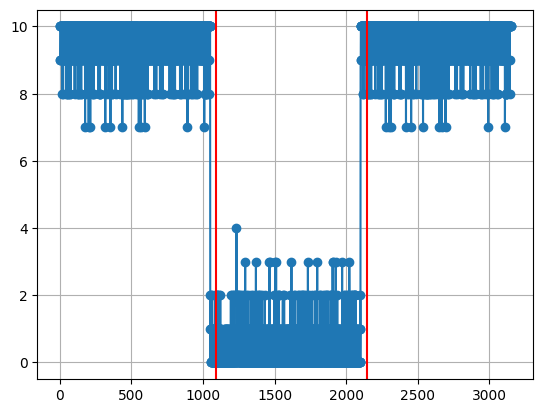

In [ ]:
import matplotlib.pyplot as plt

plt.plot(data, marker='o')
plt.grid()
for drift_detected in drifts:
    plt.axvline(drift_detected, color='red')
plt.show()